<a href="https://colab.research.google.com/github/Mosabbir19/ML-projects/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course No:** ETE 456

**Course Title:** Neural and Fuzzy Systems in Communications Sessional

**ID: 1608019**

**Experiment name:** A Neural Network based analysis to Classify Diabetes

**Objective**


1.   To classify a real world problem using Neural Network.



**Description:**
First data is read using pandas library and then null value is checked for each column. Feature and target value is taken from dataset and splitted it into train and test set. Data is normalized using StandardScalar for large scale values. After that, a neural network model is built using keras library. Then model is compiled with binary crossentropy loss, adam optimizer and accuray metric. Now, model is trained using train dataset and checked the performance of the model. Using matplolib library, loss and accuracy curve is plotted for tarin and validation set.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-20 19:00:22--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-20 19:00:22--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc36a8ee4bf2b97c5512eaa86d5.dl.dropboxusercontent.com/cd/0/inline/BcPRdTyK7MuuOrPpMKbrr7fZbyn3fnqvPlQ-gMll_PL7UI1AbClrDgfJXFd83Co58Y6K0a3waSpjLMsX9_ab9VOS_eNCKoKuEctBKo1aYhAKSwa9KUptBguoT6Uex9FHi6efu4UrrHH7LInNt4rlSEZS/file# [following]
--2021-12-20 19:00:22--  https://ucc36a8ee4bf2b97c5512eaa86d5.dl.dropboxusercontent.com/cd/0/inline/BcPRdTyK7MuuOrPpMKbrr7fZbyn3fnqvPlQ-gMll_PL7UI1AbClrDgfJXFd83Co58Y6K0a3waSpjLMsX9_ab9

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
print(dataset[pd.isnull(dataset.Pregnancies)])
print(dataset[pd.isnull(dataset.Glucose)])
print(dataset[pd.isnull(dataset.BloodPressure)])
print(dataset[pd.isnull(dataset.SkinThickness)])
print(dataset[pd.isnull(dataset.Insulin)])
print(dataset[pd.isnull(dataset.BMI)])
print(dataset[pd.isnull(dataset.DiabetesPedigreeFunction)])
print(dataset[pd.isnull(dataset.Age)])
print(dataset[pd.isnull(dataset.Outcome)])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty 

In [ ]:
feature = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = dataset[['Outcome']] 

In [ ]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [ ]:
x_sc = StandardScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Here, a sequential model is developed using keras library. There is an input layer, two hidden layers and an output layer. The input layer contains of 10 neurons, hidden layers contain of 20 and 10 neurons respectively and output layer has 1 neuron. Relu is applied as an activation function in every dense layer without the last layer. In the last layer, sigmoid is used because our dataset is a binary class problem.


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                90        
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=50, 
                    validation_split=0.1)

Epoch 1/50
18/18 [==============================] - 4s 77ms/step - loss: 0.6540 - accuracy: 0.6431 - val_loss: 0.6177 - val_accuracy: 0.7097
Epoch 2/50
18/18 [==============================] - 0s 10ms/step - loss: 0.6261 - accuracy: 0.6558 - val_loss: 0.5896 - val_accuracy: 0.7258
Epoch 3/50
18/18 [==============================] - 0s 10ms/step - loss: 0.6052 - accuracy: 0.6739 - val_loss: 0.5670 - val_accuracy: 0.7258
Epoch 4/50
18/18 [==============================] - 0s 13ms/step - loss: 0.5866 - accuracy: 0.6739 - val_loss: 0.5513 - val_accuracy: 0.7419
Epoch 5/50
18/18 [==============================] - 0s 17ms/step - loss: 0.5709 - accuracy: 0.6848 - val_loss: 0.5359 - val_accuracy: 0.7419
Epoch 6/50
18/18 [==============================] - 0s 11ms/step - loss: 0.5569 - accuracy: 0.6975 - val_loss: 0.5235 - val_accuracy: 0.7419
Epoch 7/50
18/18 [==============================] - 0s 13ms/step - loss: 0.5452 - accuracy: 0.6993 - val_loss: 0.5117 - val_accuracy: 0.7742
Epoch 8/50
18

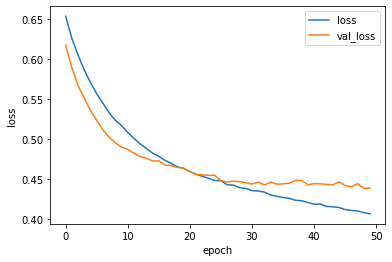

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

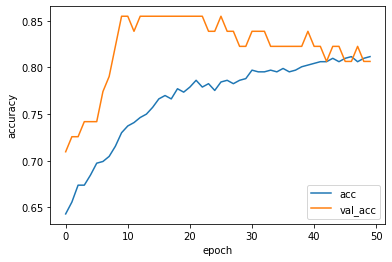

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

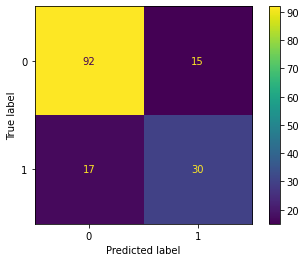

              precision    recall  f1-score   support

          No       0.84      0.86      0.85       107
         Yes       0.67      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
pred = y_pred.astype('uint8')
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

For no class, it gives 92 correctly prediction and 15 wrong prediction. For yes class, it gives 17 wrong prediction and 30 correct prediction.

In [ ]:
! pip install klib

In [ ]:
import klib
klib.corr_mat(dataset)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


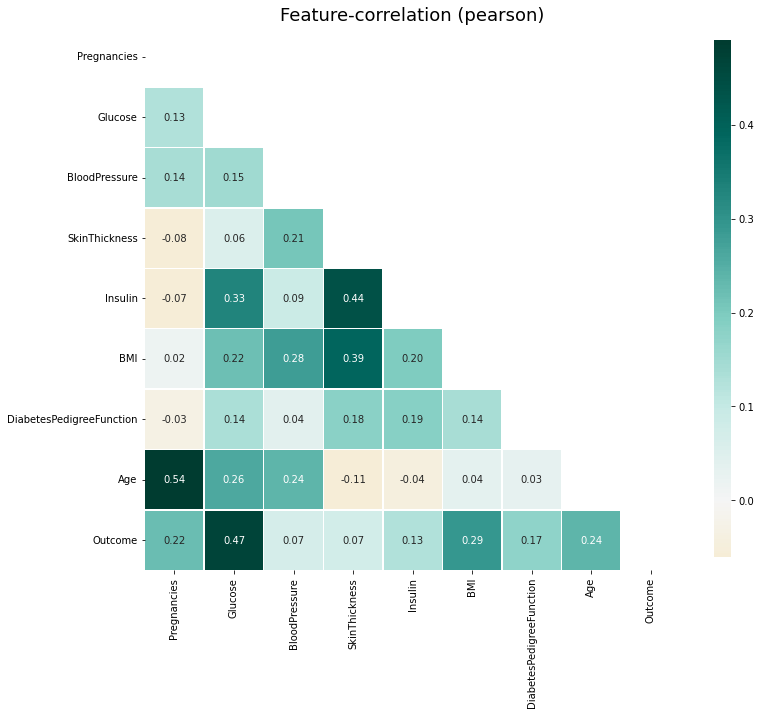

In [ ]:
klib.corr_plot(dataset)

Here, age feature is highly correlated with Pregnancies. Insulin is highly correlated with Glucose and SkinThickness. BMI is also correlated with SkinThickness. Features values Pregnancies, Glucose, BMI and Age are correlated with target value Outcome.

In [ ]:
new_feature = dataset[['Pregnancies', 'Glucose', 'BMI', 'Age']]
new_feature

,Pregnancies,Glucose,BMI,Age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(new_feature,target,test_size = 0.2,random_state = 0)

In [ ]:
x_sc = StandardScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=50, 
                    validation_split=0.1)

Epoch 1/50
18/18 [==============================] - 1s 23ms/step - loss: 0.6721 - accuracy: 0.6504 - val_loss: 0.6666 - val_accuracy: 0.6774
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 0.6469 - accuracy: 0.7011 - val_loss: 0.6386 - val_accuracy: 0.7903
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.6229 - accuracy: 0.7355 - val_loss: 0.6113 - val_accuracy: 0.8226
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 0.6000 - accuracy: 0.7391 - val_loss: 0.5826 - val_accuracy: 0.8387
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5785 - accuracy: 0.7446 - val_loss: 0.5557 - val_accuracy: 0.8387
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: 0.5581 - accuracy: 0.7464 - val_loss: 0.5360 - val_accuracy: 0.8387
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5417 - accuracy: 0.7446 - val_loss: 0.5201 - val_accuracy: 0.8387
Epoch 8/50
18/18 [=

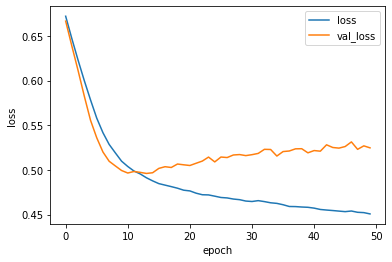

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

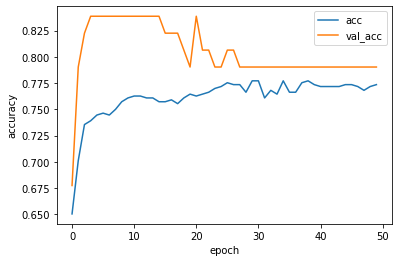

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

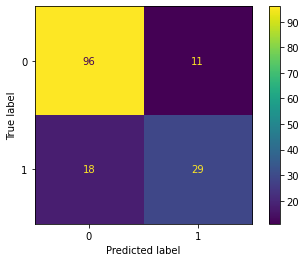

              precision    recall  f1-score   support

          No       0.84      0.90      0.87       107
         Yes       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
pred = y_pred.astype('uint8')
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

For no class, it gives 96 correctly prediction and 11 wrong prediction. For yes class, it gives 18 wrong prediction and 29 correct prediction.

# **Final Result**


> **Selecting all features:**



              precision    recall  f1-score   support

          No       0.84      0.86      0.85       107
         Yes       0.67      0.64      0.65        47

    accuracy                           0.79       154
    macro avg      0.76      0.75      0.75       154
    weighted avg   0.79      0.79      0.79       154




> **Selecting some features:**


              precision    recall  f1-score   support

          No       0.84      0.90      0.87       107
         Yes       0.72      0.62      0.67        47

    accuracy                           0.81       154
    macro avg      0.78      0.76      0.77       154
    weighted avg   0.81      0.81      0.81       154

**Conclusion:**
In this experiment, a neural network model is developed using keras library. The performance is observed after taking all and some of the features. The best performing result is found for some of the features. The accuracy is observed 81% in this case. 